In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from pandas import read_csv
import os
from sklearn import preprocessing
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
np.random.seed(1)
tf.compat.v1.disable_v2_behavior() 
sns.set_theme(style="whitegrid")
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import shap
import warnings


In [13]:
#seoul_pow
#pusan_pow
#jeju_pow
#kor_dust

DATA_NAME = 'seoul_pow'
MODEL_NAME = 'TEST_2'
#Features = ['기온(°C)','강수량(mm)','일조(hr)','일사(MJ/m2)']
Features = ['풍속(m/s)','습도(%)','일사(MJ/m2)','지면온도(°C)']
Target = '전력거래량'
CLASSFICATION_EPOCH = 200
EPOCH = 20


dataset = read_csv('./data/'+DATA_NAME+'.csv')

dataset_day = read_csv('./data/'+DATA_NAME+'_day.csv')

print('Data Cols / ',dataset.columns)
print(dataset.head(10))

Data Cols /  Index(['Unnamed: 0', '연료원', '지역세부구분', '거래일', '시간', '전력거래량', 'YMDH', 'month',
       'fullday', 'season', 'year', '지점', '지점명', '기온(°C)', '강수량(mm)',
       '강수량 QC플래그', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)',
       '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')
   Unnamed: 0  연료원 지역세부구분         거래일  시간     전력거래량        YMDH  month  \
0           0  태양광    서울시  2014-01-01   1  0.000000  2014010101      1   
1           1  태양광    서울시  2014-01-01   2  0.000000  2014010102      1   
2           2  태양광    서울시  2014-01-01   3  0.000000  2014010103      1   
3           3  태양광    서울시  2014-01-01   4  0.000000  2014010104      1   
4           4  태양광    서울시  2014-01-01   5  0.000000  2014010105      1   
5           5  태양광   

In [8]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
    
corr = dataset.corr(method = 'pearson') 
corr2 = dataset.corr(method = 'kendall')
corr3 = dataset.corr(method = 'spearman')

print('\t pearson \t kendall \t spearman')
display_side_by_side(corr.iloc[:,2:3],corr2.iloc[:,2:3],corr3.iloc[:,2:3])

	 pearson 	 kendall 	 spearman


,전력거래량
Unnamed: 0,0.055823
시간,0.156588
전력거래량,1.000000
YMDH,0.061016
month,-0.039755
fullday,0.061015
year,0.061622
지점,NaN
기온(°C),0.240360
강수량(mm),-0.065343


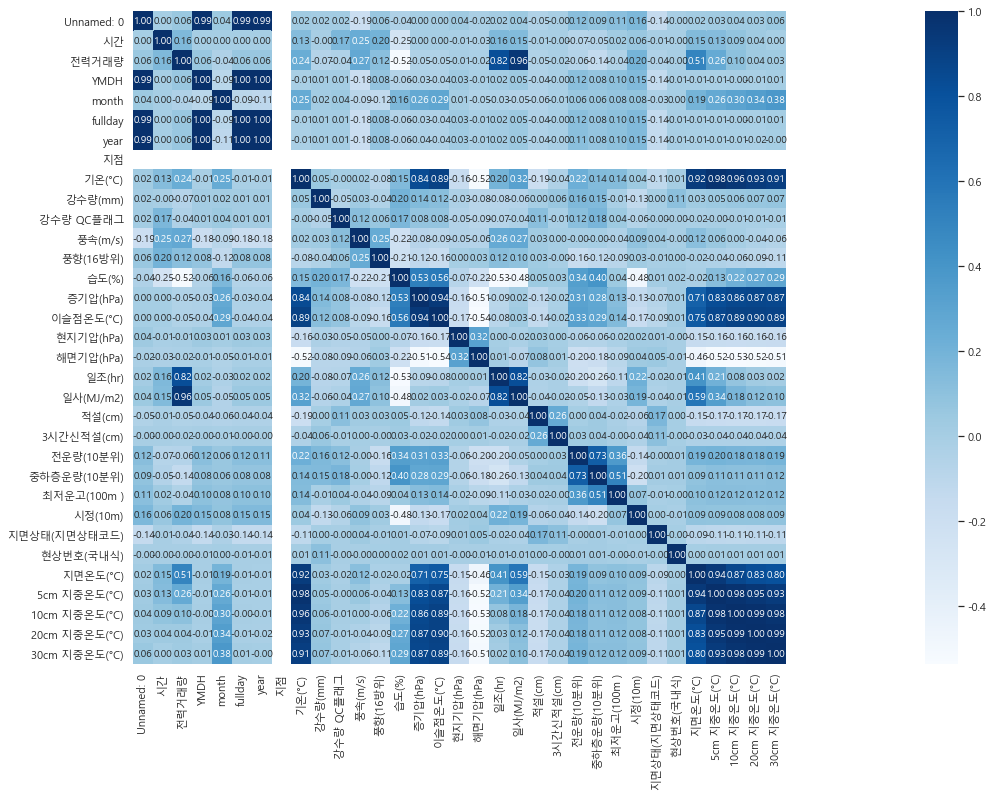

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, ax = plt.subplots(figsize=(50,12))  
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')


            풍속(m/s)         습도(%)     일사(MJ/m2)      지면온도(°C)
count  57696.000000  57696.000000  57696.000000  57696.000000
mean       2.266252     59.006777      0.546242     15.048988
std        1.290696     20.268670      0.819849     13.397799
min        0.000000      0.000000      0.000000    -13.600000
25%        1.300000     44.000000      0.000000      3.000000
50%        2.100000     59.000000      0.020000     14.700000
75%        3.000000     75.000000      0.910000     24.300000
max       10.500000    100.000000      3.780000     65.100000


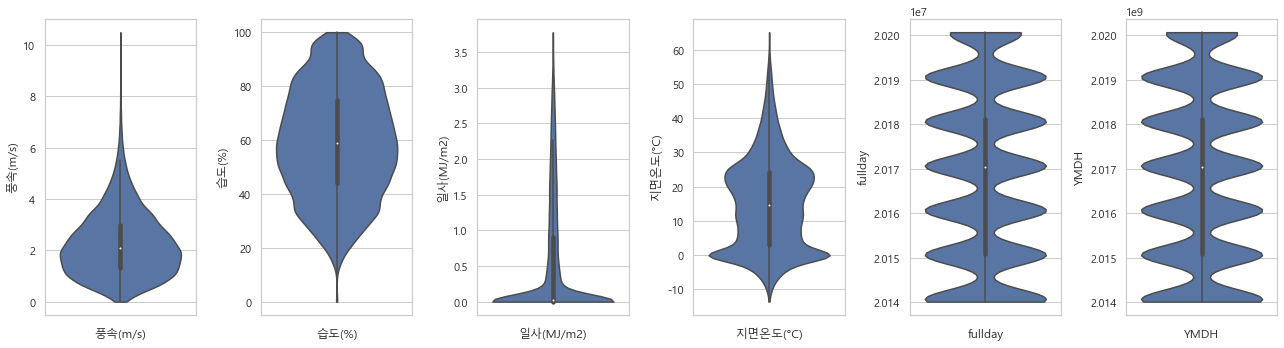

,풍속(m/s),습도(%),일사(MJ/m2),지면온도(°C),fullday,YMDH
풍속(m/s),1.000000,-0.215415,0.271211,0.117153,-0.177759,-0.177758
습도(%),-0.215415,1.000000,-0.484609,-0.017211,-0.061254,-0.061255
일사(MJ/m2),0.271211,-0.484609,1.000000,0.591502,0.048855,0.048855
지면온도(°C),0.117153,-0.017211,0.591502,1.000000,-0.006547,-0.006546
fullday,-0.177759,-0.061254,0.048855,-0.006547,1.000000,1.000000
YMDH,-0.177758,-0.061255,0.048855,-0.006546,1.000000,1.000000


In [14]:
print(dataset[Features].describe())
Features.append('fullday')
Features.append('YMDH')

DF=dataset


TEST=DF[Features]

Target_LIST = DF[Target].to_list()

fig = plt.figure(figsize=(3*len(Features),5))
gs = fig.add_gridspec(1, len(Features))

for i in range(len(Features)):
    ax = fig.add_subplot(gs[0, i])
    sns.violinplot(y=TEST[Features[i]],cut=0)
    ax.set_xlabel(Features[i])

fig.tight_layout()
plt.show()

TEST.corr()

In [4]:


#['기온(°C)','습도(%)','전력거래량','강수량(mm)','풍속(m/s)','일조(hr)','일사(MJ/m2)']
#이하, 초과 [MAX, MIN]

#    '0': {
#        '기온(°C)': [[1.00, .75]],'강수량(mm)': [[1.00, .75]]
#    }, 

FeaturesRange = {
    '0': {
        '기온(°C)': [[1.00, .75]],'강수량(mm)': [[1.00, .75]]
    }, 
    '1': {
        '기온(°C)': [[.25, 0]]
    }, 
    '2': {
        '강수량(mm)': [[1.0, 0.00]]
    }
}
'''
FeaturesRange = {
    '0': {
        '일조(hr)': [[1.0, 0.75]]
    }, 
    '1': {
        '일조(hr)': [[0.75, 0.5]]
    }, 
    '2': {
        '일조(hr)': [[0.5, 0.25]]
    }, 
    '3': {
        '일조(hr)': [[0.25, 0.00]]
    }
}
'''

"\nFeaturesRange = {\n    '0': {\n        '일조(hr)': [[1.0, 0.75]]\n    }, \n    '1': {\n        '일조(hr)': [[0.75, 0.5]]\n    }, \n    '2': {\n        '일조(hr)': [[0.5, 0.25]]\n    }, \n    '3': {\n        '일조(hr)': [[0.25, 0.00]]\n    }\n}\n"

In [5]:
OTHER_FLAG = True
def GetSubSets(_DF,_dataset_day,FeaturesRange):
    
    full_df = _DF
    full_df['Group'] = 'Other'

    day_df = _dataset_day
    LAST_DAY = full_df[-2:-1]
    LAST_DAY = int(LAST_DAY['fullday'])
    CAP_DAY =[]
    print(LAST_DAY)
    

    #print(FeaturesRange)
    #{'0': {'temprt': [[80, 70]], 'rain': [[90, 78.2]], 'wnd_spd': [[100, 90]], 'humdt': [[80, 70]], 'cloud': [[100, 90]]}, '1': {'rain': [[100, 90]]}, '2': {'temprt': [[90, 80]], 'humdt': [[90, 80]]}, '3': {'temprt': [[100, 90]], 'humdt': [[100, 90]]}}
    #del FeaturesRange['0']
    res_GDF = []
    GroupDF = {}
    for Groups in FeaturesRange:
        TMP = FeaturesRange[Groups]
        GroupDF[Groups] = day_df
        for Feature in TMP:
            Filters = TMP[Feature]
            F_MAX = day_df[Feature].max()
            F_MIN = day_df[Feature].min()
            ABSRange = abs(F_MIN-F_MAX)

            for MAX,MIN in Filters:
                MAX=ABSRange*MAX
                MIN=ABSRange*MIN
                
                MAX = MAX+F_MIN
                MIN = MIN+F_MIN

                #print(MAX,F_MAX,ABSRange,F_MIN,F_MAX,Feature)
                GroupDF[Groups] = GroupDF[Groups].loc[(GroupDF[Groups][Feature] > MIN) & (GroupDF[Groups][Feature] <= MAX)]
        #print(GroupDF[Groups].describe())

    for Groups in GroupDF:
        list_of_day = GroupDF[Groups]['fullday'].tolist()
        TMP_DATAFRAME = pd.DataFrame()
        CAP_DAY+=list_of_day
        if LAST_DAY in list_of_day:
            list_of_day.remove(LAST_DAY)
        
        for i in list_of_day:
            tmp_ST = full_df.loc[full_df['fullday']==i].index[0]
            TMP_DF = pd.DataFrame(full_df[tmp_ST:tmp_ST+24])
            TMP_DF.reset_index(inplace=True, drop=True)
            TMP_DF.insert(loc=0, column='TARGET', value=Target_LIST[tmp_ST+24:tmp_ST+48])
            
            TMP_DATAFRAME = pd.concat([TMP_DATAFRAME,TMP_DF],ignore_index=True)
            
        TMP_DATAFRAME['Group'] = Groups
        TMP_DATAFRAME.sort_values("YMDH", ascending=True)
        if not TMP_DATAFRAME.empty:
            res_GDF.append(TMP_DATAFRAME)
        
    full_df = full_df.shift(24)
    full_df.insert(loc=0, column='TARGET', value=Target_LIST)
    
    full_df = full_df.drop(full_df.loc[full_df['fullday'].isin(CAP_DAY)].index, errors='ignore')
    
    full_df=full_df.dropna(axis=0)

    full_df = full_df.sort_values("YMDH", ascending=True)
    full_df.reset_index(inplace=True, drop=True)
    full_df['fullday'] = full_df['fullday'].astype(int)
    if not full_df.empty:
        res_GDF.append(full_df)
    else:
        OTHER_FLAG=False

    '''
    for Groups in GroupDF:
        full_df = pd.concat([full_df,GroupDF[Groups]],ignore_index=True)
    full_df = full_df.sort_values("ymdhms", ascending=True)
    print(full_df.groupby('Group').count())
    '''
    
    return res_GDF


In [6]:
RES_TEST = GetSubSets(TEST,dataset_day,FeaturesRange)
for Q in RES_TEST:
    print(Q.groupby('Group').count())

Features.remove('fullday')
Features.remove('YMDH')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


20200731
       TARGET  기온(°C)  강수량(mm)  일조(hr)  일사(MJ/m2)  fullday   YMDH
Group                                                            
0       17544   17544    17544   17544      17544    17544  17544
       TARGET  기온(°C)  강수량(mm)  일조(hr)  일사(MJ/m2)  fullday  YMDH
Group                                                           
1        4104    4104     4104    4104       4104     4104  4104
       TARGET  기온(°C)  강수량(mm)  일조(hr)  일사(MJ/m2)  fullday   YMDH
Group                                                            
2       16152   16152    16152   16152      16152    16152  16152
       TARGET  기온(°C)  강수량(mm)  일조(hr)  일사(MJ/m2)  fullday   YMDH
Group                                                            
Other   26592   26592    26592   26592      26592    26592  26592


In [7]:

#'MINMAX'
#'STD'
#'YEO'
# ''
SCALE_FUNC = 'MINMAX'

def SCALE_FUCTIONS(_DF):
    TMP_TARGET = _DF['TARGET'].to_list()
    
    _DF=_DF[Features]
    if SCALE_FUNC == 'MINMAX':
        _DF = MINMAX_scaler.fit_transform(_DF)
    elif SCALE_FUNC == 'STD':
        _DF = STD_scaler.fit_transform(_DF.values)
    elif SCALE_FUNC == 'YEO':
        _DF = YEO_scaler.fit_transform(_DF)
    else:
        _DF = _DF
    
    _DF = pd.DataFrame(_DF,columns=Features)
    _DF.insert(loc=0, column='TARGET', value=TMP_TARGET)
    return _DF
    

MINMAX_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
STD_scaler = preprocessing.StandardScaler()
YEO_scaler = preprocessing.PowerTransformer(method='yeo-johnson')

ALL_X=DF[Features]
print(ALL_X)
ALL_X = ALL_X.shift(24)
ALL_X.insert(loc=0, column='TARGET', value=Target_LIST)
ALL_X=ALL_X.dropna(axis=0)
ALL_X.reset_index(inplace=True, drop=True)
RES_TEST.append(ALL_X)

for i in range(len(RES_TEST)):
    RES_TEST[i] = SCALE_FUCTIONS(RES_TEST[i])
    

       기온(°C)  강수량(mm)  일조(hr)  일사(MJ/m2)
0         2.6      0.0     0.0       0.00
1         1.7      0.0     0.0       0.00
2         1.4      0.0     0.0       0.00
3         0.9      0.0     0.0       0.00
4         0.6      0.0     0.0       0.00
...       ...      ...     ...        ...
57691    27.0      0.0     0.0       0.09
57692    26.7      0.0     0.0       0.00
57693    26.5      0.0     0.0       0.00
57694    26.2      0.2     0.0       0.00
57695    23.4      0.0     0.0       0.00

[57696 rows x 4 columns]


In [8]:
'''
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
  # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i*24))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i*24))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
  # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
'''

"\ndef series_to_supervised(data, n_in=1, n_out=1, dropnan=True):\n    n_vars = 1 if type(data) is list else data.shape[1]\n    df = pd.DataFrame(data)\n    cols, names = list(), list()\n  # input sequence (t-n, ... t-1)\n    for i in range(n_in, 0, -1):\n        cols.append(df.shift(i*24))\n        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]\n  # forecast sequence (t, t+1, ... t+n)\n    for i in range(0, n_out):\n        cols.append(df.shift(-i*24))\n        if i == 0:\n            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]\n        else:\n            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]\n  # put it all together\n    agg = pd.concat(cols, axis=1)\n    agg.columns = names\n  # drop rows with NaN values\n    if dropnan:\n        agg.dropna(inplace=True)\n    return agg\n"

In [9]:
G_TRAIN_X = []
G_TRAIN_y = []

G_TEST_X = []
G_TEST_y = []

G_DISPLAY_Y = []
G_DISPLAY_TEST_Y = []

for G in RES_TEST:
    values = G.values
    Xdata = values[:, 1:]
    Xdata = Xdata.reshape((int(Xdata.shape[0]/24),24,len(Features)))
    
    G_TRAIN_X.append(Xdata[:int(Xdata.shape[0]*0.8)])
    G_TEST_X.append(Xdata[int(Xdata.shape[0]*0.8):])
    
    Ydata = values[:, 0]
    Ydata = Ydata.reshape((int(Ydata.shape[0]/24),24))
    
    G_DISPLAY_Y.append(Ydata[:int(Ydata.shape[0]*0.8)])
    G_DISPLAY_TEST_Y.append(Ydata[int(Ydata.shape[0]*0.8):])
    
    Ydata = Ydata.reshape((Ydata.shape[0],Ydata.shape[1],1))

    G_TRAIN_y.append(Ydata[:int(Ydata.shape[0]*0.8)])
    G_TEST_y.append(Ydata[int(Ydata.shape[0]*0.8):])


CLASSIFI_X = G_TRAIN_X[0]
CLASSIFI_y = [0 for _ in range(G_TRAIN_X[0].shape[0])]

CLASSIFI_TEST_X = G_TEST_X[0]
CLASSIFI_TEST_y = [0 for _ in range(G_TEST_X[0].shape[0])]

for G in range(1,len(RES_TEST)-1):
    CLASSIFI_X = np.concatenate((CLASSIFI_X, G_TRAIN_X[G]), axis=0)
    CLASSIFI_y = CLASSIFI_y + [G for _ in range(G_TRAIN_X[G].shape[0])]
    
    CLASSIFI_TEST_X = np.concatenate((CLASSIFI_TEST_X, G_TEST_X[G]), axis=0)
    CLASSIFI_TEST_y = CLASSIFI_TEST_y + [G for _ in range(G_TEST_X[G].shape[0])]

CLASSIFI_X = CLASSIFI_X.reshape((CLASSIFI_X.shape[0],CLASSIFI_X.shape[1]*CLASSIFI_X.shape[2]))
CLASSIFI_TEST_X = CLASSIFI_TEST_X.reshape((CLASSIFI_TEST_X.shape[0],CLASSIFI_TEST_X.shape[1]*CLASSIFI_TEST_X.shape[2]))

CLASSIFI_y = np.array(CLASSIFI_y)
CLASSIFI_y_Dis = CLASSIFI_y
CLASSIFI_y = pd.get_dummies(CLASSIFI_y)

CLASSIFI_TEST_y
CLASSIFI_TEST_y = np.array(CLASSIFI_TEST_y)
CLASSIFI_TEST_y_Dis = CLASSIFI_TEST_y
CLASSIFI_TEST_y = pd.get_dummies(CLASSIFI_TEST_y)

print(CLASSIFI_X.shape)
print(CLASSIFI_y.shape)
print(CLASSIFI_y.head())
print(G_DISPLAY_Y)

(2144, 96)
(2144, 4)
   0  1  2  3
0  1  0  0  0
1  1  0  0  0
2  1  0  0  0
3  1  0  0  0
4  1  0  0  0
[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [2.4e-05, 2.4e-05, 2.4e-05, ..., 2.4e-05, 2.4e-05, 2.4e-05],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 

In [10]:
from tensorflow.keras import layers
from tensorflow import keras

MODEL_PATH ='models/'+DATA_NAME+'/'+MODEL_NAME 
os.makedirs(MODEL_PATH, exist_ok=True)

csv_logger = tf.keras.callbacks.CSVLogger(MODEL_PATH+'/'+MODEL_NAME+'_CLASSIFICATION_epoch'+'.csv', separator=',')

MD = keras.Sequential()
MD.add(layers.Dense(CLASSIFI_X.shape[1], input_dim = CLASSIFI_X.shape[1], activation = 'relu')) # Rectified Linear Unit Activation Function
MD.add(layers.Dense(64, activation = 'relu'))
MD.add(layers.Dense(32, activation = 'relu'))
MD.add(layers.Dense(CLASSIFI_y.shape[1], activation = 'softmax')) # Softmax for multi-class classification
# Compile model here
MD.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

MD.fit(CLASSIFI_X, CLASSIFI_y, epochs=CLASSFICATION_EPOCH, verbose=1, shuffle=False, callbacks=[csv_logger])

MD.save(MODEL_PATH+'/'+MODEL_NAME+'_CLASSIFICATION.h5')
#model_functional.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=["mean_absolute_error"])
#model.compile(loss='mean_squared_logarithmic_error', optimizer=optimizer, metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 2144 samples
Epoch 1/200
2144/2144 [==============================] - 0s 36us/sample - loss: 1.4982 - acc: 0.3172
Epoch 2/200
2144/2144 [==============================] - 0s 46us/sample - loss: 1.3200 - acc: 0.3060
Epoch 3/200
2144/2144 [==============================] - 0s 38us/sample - loss: 1.4127 - acc: 0.2136
Epoch 4/200
2144/2144 [==============================] - 0s 49us/sample - loss: 1.3689 - acc: 0.2817
Epoch 5/200
2144/2144 [==============================] - 0s 38us/sample - loss: 1.3706 - acc: 0.2878
Epoch 6/200
2144/2144 [==============================] - 0s 46us/sample - loss: 1.4756 - acc: 0.2752
Epoch 7/200
2144/2144 [==============================] - 0s 49us/sample - loss: 1.3521 - acc: 0.2971
Epoch 8/200
2144/2144 [==============================] - 0s 44us/sample - loss: 1.4132 - acc: 0.3601
Epoch 9/200
2144/2144 [==============================] - 0s 39us/sample - loss: 1.2937 - 

2144/2144 [==============================] - 0s 29us/sample - loss: 0.5562 - acc: 0.7635
Epoch 69/200
2144/2144 [==============================] - 0s 28us/sample - loss: 0.5399 - acc: 0.7640
Epoch 70/200
2144/2144 [==============================] - 0s 29us/sample - loss: 0.5277 - acc: 0.7687
Epoch 71/200
2144/2144 [==============================] - 0s 30us/sample - loss: 0.5130 - acc: 0.7729
Epoch 72/200
2144/2144 [==============================] - 0s 31us/sample - loss: 0.5057 - acc: 0.7766
Epoch 73/200
2144/2144 [==============================] - 0s 29us/sample - loss: 0.5108 - acc: 0.7757
Epoch 74/200
2144/2144 [==============================] - 0s 29us/sample - loss: 0.4972 - acc: 0.7808
Epoch 75/200
2144/2144 [==============================] - 0s 31us/sample - loss: 0.4971 - acc: 0.7808
Epoch 76/200
2144/2144 [==============================] - 0s 31us/sample - loss: 0.4806 - acc: 0.7901
Epoch 77/200
2144/2144 [==============================] - 0s 31us/sample - loss: 0.4833 - acc: 

Epoch 148/200
2144/2144 [==============================] - 0s 32us/sample - loss: 0.2474 - acc: 0.8661
Epoch 149/200
2144/2144 [==============================] - 0s 36us/sample - loss: 0.2446 - acc: 0.8680
Epoch 150/200
2144/2144 [==============================] - 0s 36us/sample - loss: 0.2425 - acc: 0.8680
Epoch 151/200
2144/2144 [==============================] - 0s 36us/sample - loss: 0.2438 - acc: 0.8685
Epoch 152/200
2144/2144 [==============================] - 0s 38us/sample - loss: 0.2405 - acc: 0.8713
Epoch 153/200
2144/2144 [==============================] - 0s 32us/sample - loss: 0.2399 - acc: 0.8713
Epoch 154/200
2144/2144 [==============================] - 0s 35us/sample - loss: 0.2352 - acc: 0.8745
Epoch 155/200
2144/2144 [==============================] - 0s 32us/sample - loss: 0.2349 - acc: 0.8727
Epoch 156/200
2144/2144 [==============================] - 0s 30us/sample - loss: 0.2348 - acc: 0.8722
Epoch 157/200
2144/2144 [==============================] - 0s 30us/sample

In [11]:
CLASSFICATION_PATH = MODEL_PATH+'/'+MODEL_NAME+'_CLASSIFICATION.h5'

import random

testlinC = []
for i in range(100):
    testlinC.append(random.randint(0, CLASSIFI_TEST_X.shape[0]-1))

enTest_X = CLASSIFI_TEST_X[testlinC, :]
enTest_y = CLASSIFI_TEST_y_Dis[testlinC]

enTest_dis_y= G_DISPLAY_TEST_Y[:-1]
enTest_dis_y = np.vstack(enTest_dis_y)
enTest_dis_y = enTest_dis_y[testlinC,:]

print(enTest_dis_y.shape)

print(enTest_X.shape)

(100, 24)
(100, 96)


In [12]:
explainer = shap.DeepExplainer(MD, CLASSIFI_X)
expected_value = explainer.expected_value
shap_values = explainer.shap_values(enTest_X)

Using TensorFlow backend.
keras is no longer supported, please use tf.keras instead.


In [13]:
#print(shap_values[0].shape)
import json
with open(MODEL_PATH+'/'+MODEL_NAME+'_FEAT_RANGE.json', "w") as outfile: 
    json.dump(FeaturesRange, outfile)

pd.DataFrame( data = {'expected_value': expected_value } ).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_EXP.csv')
pd.DataFrame( data = {'Features': Features } ).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_Features.csv')
pd.DataFrame(data = {'TEST_idx': testlinC }).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_TEST_idx.csv')

for i in range(len(shap_values)):
    if i == (len(shap_values)-1) and OTHER_FLAG:
        pd.DataFrame(shap_values[i]).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_G_Other.csv')
    else:
        pd.DataFrame(shap_values[i]).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_G_'+str(i)+'.csv')


weights_dict = [dict() for _ in range(len(RES_TEST))]
def TEMPFUNC(TI):
    return models[TI].predict(G_TRAIN_X[TI])


# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#validate_X = validate_X.reshape((validate_X.shape[0], 1, validate_X.shape[1]))



def build_model(train_X, train_y ):
    M = tf.keras.Sequential()
    M.add(tf.keras.layers.LSTM(200,  input_shape = (train_X.shape[1], train_X.shape[2])))
    M.add(tf.keras.layers.RepeatVector(24))
    M.add(tf.keras.layers.LSTM(200,  return_sequences=True))
    M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation='relu')))
    M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))

    optimizer = tf.keras.optimizers.Adam()

    M.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_squared_error','mean_squared_logarithmic_error'])
    return M




models = []
for GN in range(len(RES_TEST)):
    models.append(build_model(G_TRAIN_X[GN],G_TRAIN_y[GN]))

    
    
for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-2 and OTHER_FLAG:
        GNAME = 'Other'
    elif GN == len(models)-1:
        GNAME = 'All'
        
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    os.makedirs(_path, exist_ok=True)
    weight_callback = tf.keras.callbacks.LambdaCallback( on_epoch_end=lambda epoch, logs: weights_dict[GN].update({epoch:TEMPFUNC(GN)}))
    csv_logger = tf.keras.callbacks.CSVLogger(_path+'/'+DATA_NAME+'_G_'+GNAME+'_epoch'+'.csv', separator=',')
    
    models[GN].fit(G_TRAIN_X[GN], G_TRAIN_y[GN], epochs=EPOCH, verbose=1, shuffle=False, callbacks=[weight_callback,csv_logger] )

    BIAS_DEF = []
    VAR_DEF = []
    for T in weights_dict[GN]:
        YT = weights_dict[GN][T].reshape((int(G_TRAIN_X[GN].shape[0]),24))
        YT_var = [np.mean(x) for x in YT]
        var = [pow(np.mean(x)-np.mean(YT_var),2) for x in YT]
        bias = []
        for Gi in range(0,len(G_DISPLAY_Y[GN])):
            for Y_hat in range(len(G_DISPLAY_Y[GN][Gi])):
                bias.append(pow(np.mean(G_DISPLAY_Y[GN][Gi][Y_hat]) - YT[Gi][Y_hat],2))
        VAR_DEF.append(np.mean(var))
        BIAS_DEF.append(np.mean(bias))
    BV = pd.DataFrame( data = {'BIAS': BIAS_DEF, 'VAR': VAR_DEF} )
    
    models[GN].save(_path+'/'+DATA_NAME+'_G_'+GNAME+'.h5')
    BV.to_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_BIAS_VAR'+'.csv', index=False) 

Train on 584 samples
Epoch 1/20
584/584 [==============================] - 2s 3ms/sample - loss: 1.3624 - mean_squared_error: 4.4278 - mean_squared_logarithmic_error: 0.4154
Epoch 2/20
584/584 [==============================] - 1s 2ms/sample - loss: 0.7479 - mean_squared_error: 1.5969 - mean_squared_logarithmic_error: 0.1054
Epoch 3/20
584/584 [==============================] - 1s 2ms/sample - loss: 0.7577 - mean_squared_error: 1.7583 - mean_squared_logarithmic_error: 0.1121
Epoch 4/20
584/584 [==============================] - 1s 2ms/sample - loss: 0.6699 - mean_squared_error: 1.4014 - mean_squared_logarithmic_error: 0.0941
Epoch 5/20
584/584 [==============================] - 1s 2ms/sample - loss: 0.6453 - mean_squared_error: 1.3334 - mean_squared_logarithmic_error: 0.0887
Epoch 6/20
584/584 [==============================] - 1s 2ms/sample - loss: 0.6375 - mean_squared_error: 1.3191 - mean_squared_logarithmic_error: 0.0872
Epoch 7/20
584/584 [==============================] - 1s 2ms/

538/538 [==============================] - 1s 2ms/sample - loss: 0.7020 - mean_squared_error: 1.7037 - mean_squared_logarithmic_error: 0.1128
Epoch 19/20
538/538 [==============================] - 1s 2ms/sample - loss: 0.7097 - mean_squared_error: 1.7249 - mean_squared_logarithmic_error: 0.1138
Epoch 20/20
538/538 [==============================] - 2s 4ms/sample - loss: 0.7148 - mean_squared_error: 1.7464 - mean_squared_logarithmic_error: 0.1157
Train on 886 samples
Epoch 1/20
886/886 [==============================] - 2s 2ms/sample - loss: 1.3657 - mean_squared_error: 5.6590 - mean_squared_logarithmic_error: 0.5060
Epoch 2/20
886/886 [==============================] - 2s 2ms/sample - loss: 0.7315 - mean_squared_error: 1.7829 - mean_squared_logarithmic_error: 0.1250
Epoch 3/20
886/886 [==============================] - 2s 2ms/sample - loss: 0.6626 - mean_squared_error: 1.6055 - mean_squared_logarithmic_error: 0.1117
Epoch 4/20
886/886 [==============================] - 3s 3ms/sample - 

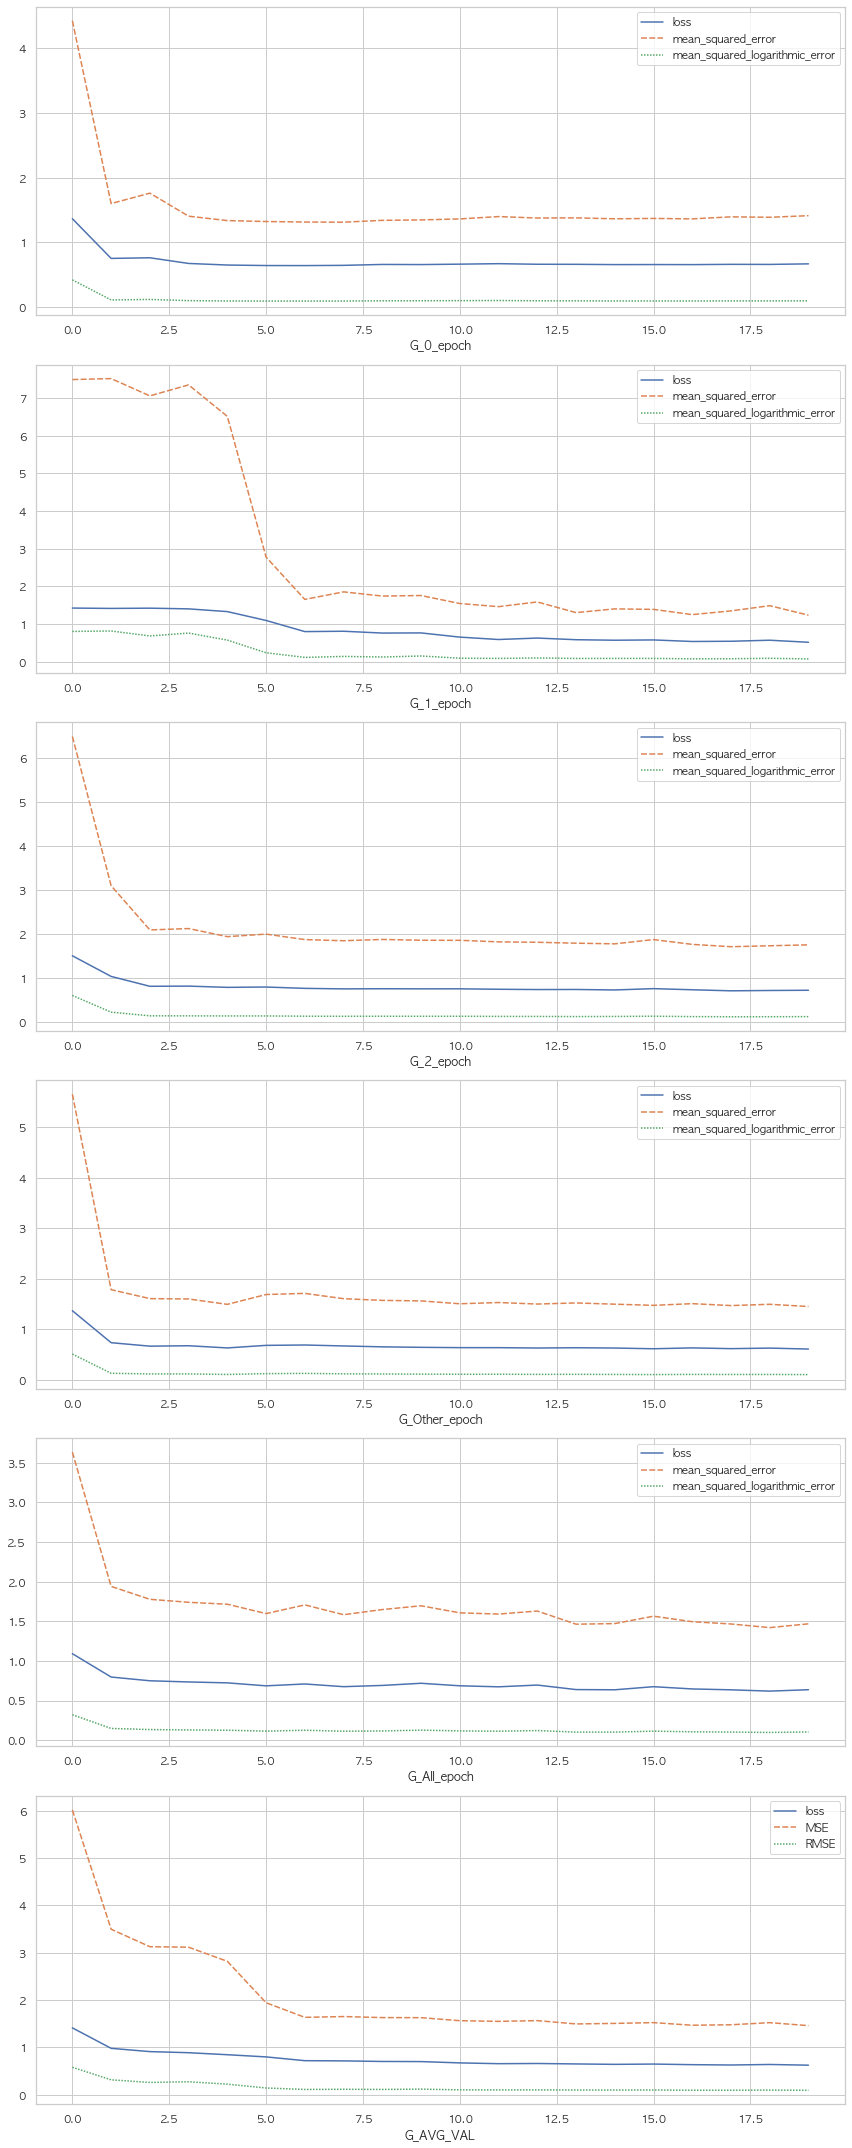

In [14]:
fig = plt.figure(figsize=(12,5*(len(models)+1)))
gs = fig.add_gridspec( (len(models)+1),1)

MSE = []
MAE = []
RMSE = []

for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-2 and OTHER_FLAG:
        GNAME = 'Other'
    elif GN == len(models)-1:
        GNAME = 'All'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    TDF = read_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_epoch'+'.csv')
    ax = fig.add_subplot(gs[GN, 0])
    sns.lineplot(data=TDF[TDF.columns.difference(['epoch'])], legend=True)
    ax.set_xlabel('G_'+GNAME+'_epoch')
    if GN != len(models)-1:
        MAE.append(TDF['loss'].to_list())
        MSE.append(TDF['mean_squared_error'].to_list())
        RMSE.append(TDF['mean_squared_logarithmic_error'].to_list())
        
MSE = np.array(MSE)
MAE = np.array(MAE)
RMSE = np.array(RMSE)

BV = pd.DataFrame( data = {'loss': MAE.mean(axis=0), 'MSE': MSE.mean(axis=0), 'RMSE':RMSE.mean(axis=0)} )

ax = fig.add_subplot(gs[GN+1, 0])
sns.lineplot(data=BV, legend=True)
ax.set_xlabel('G_AVG_VAL')

fig.tight_layout()
plt.show()

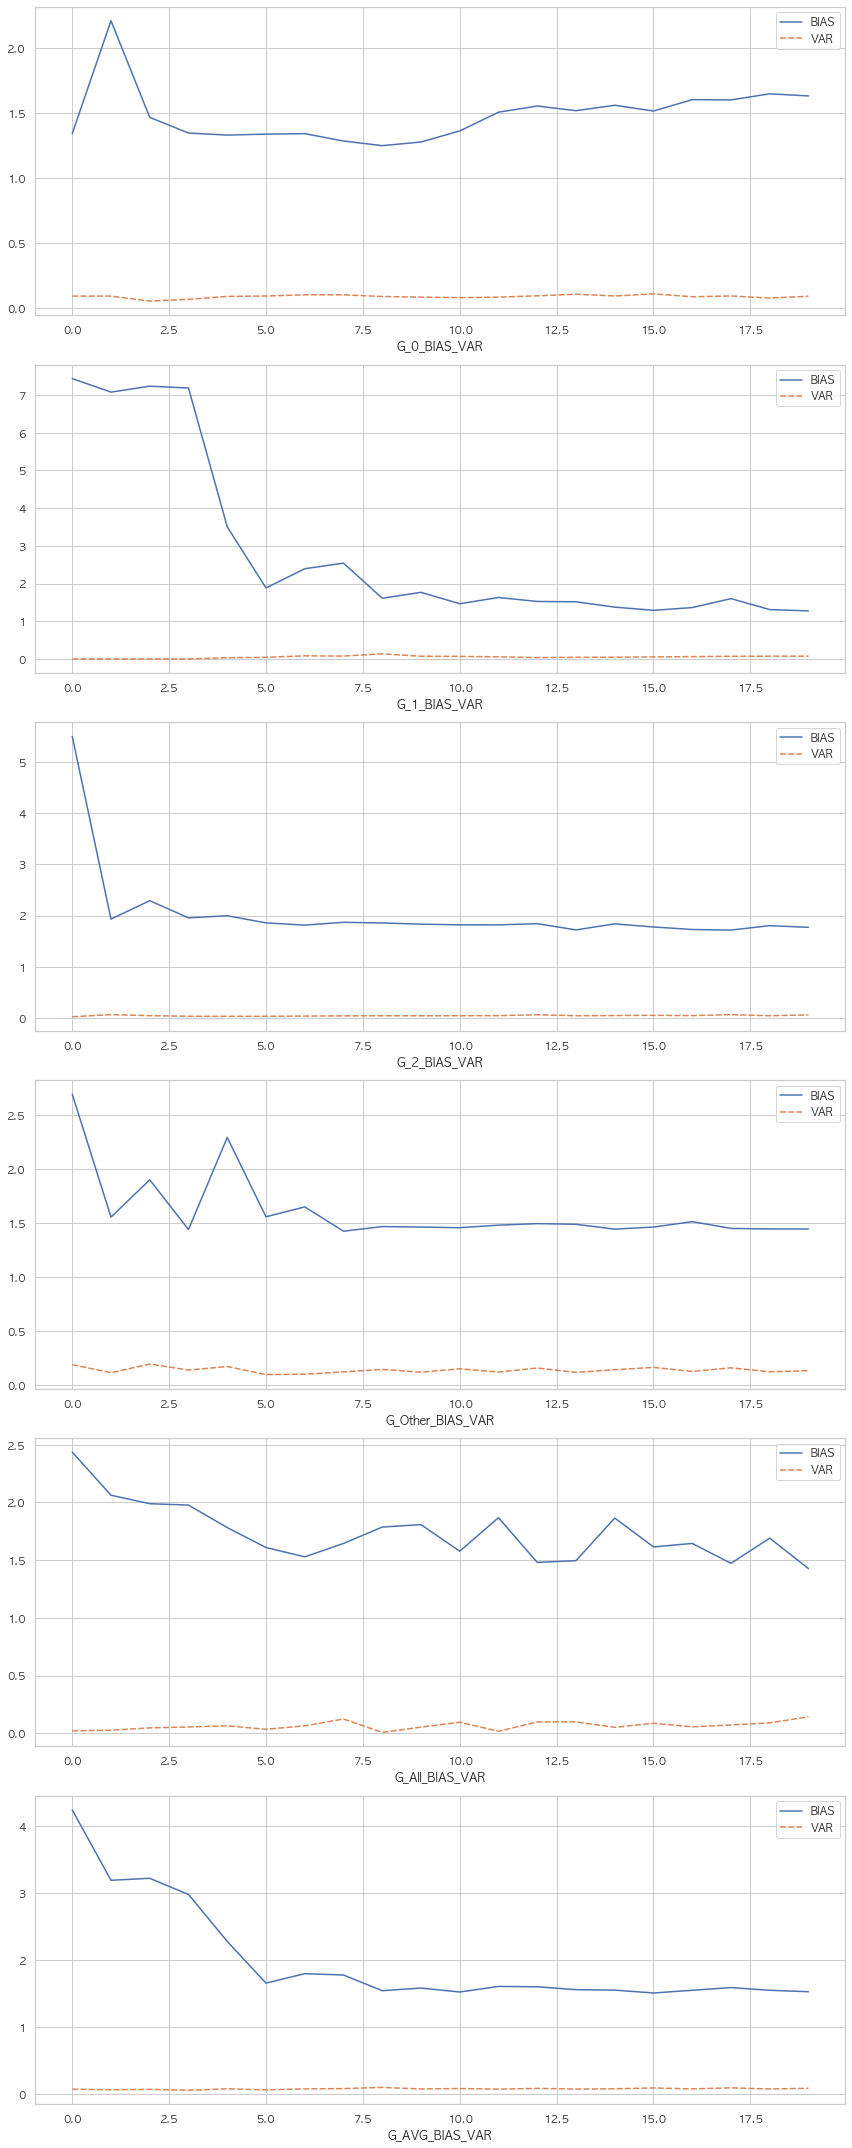

In [15]:
fig = plt.figure(figsize=(12,5*(len(models)+1)))
gs = fig.add_gridspec( (len(models)+1),1)

BIAS = []
VAR = []

for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-2 and OTHER_FLAG:
        GNAME = 'Other'
    elif GN == len(models)-1:
        GNAME = 'All'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    TDF = read_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_BIAS_VAR'+'.csv')
    ax = fig.add_subplot(gs[GN, 0])
    sns.lineplot(data=TDF, legend=True)
    if GN != len(models)-1:
        BIAS.append(TDF['BIAS'].to_list())
        VAR.append(TDF['VAR'].to_list())

    ax.set_xlabel('G_'+GNAME+'_BIAS_VAR')
BIAS = np.array(BIAS)
VAR = np.array(VAR)

BV = pd.DataFrame( data = {'BIAS': BIAS.mean(axis=0), 'VAR': VAR.mean(axis=0)} )

ax = fig.add_subplot(gs[GN+1, 0])
sns.lineplot(data=BV, legend=True)
ax.set_xlabel('G_AVG_BIAS_VAR')

fig.tight_layout()
plt.show()
    

In [16]:
ENS_MODELS = []
for GN in range(len(models)-1):
    GNAME = str(GN)
    if GN == len(models)-2 and OTHER_FLAG:
        GNAME = 'Other'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    ENS_MODELS.append(tf.keras.models.load_model(_path+'/'+DATA_NAME+'_G_'+GNAME+'.h5'))

_path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_All'
ALL_MODELS = tf.keras.models.load_model(_path+'/'+DATA_NAME+'_G_All.h5')
MD = tf.keras.models.load_model(CLASSFICATION_PATH)

class_yhat = MD.predict(enTest_X)

enTest_reg_X = enTest_X.reshape((enTest_X.shape[0],24,len(Features)))

ALL_Y_HAT = ALL_MODELS.predict(enTest_reg_X)
ENS_Y_HATS = []

for M in ENS_MODELS:
    ENS_Y_HATS.append(M.predict(enTest_reg_X))


#CLASS_X = np.reshape(CLASS_X,(1,72))
#CLASS_X.shape



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


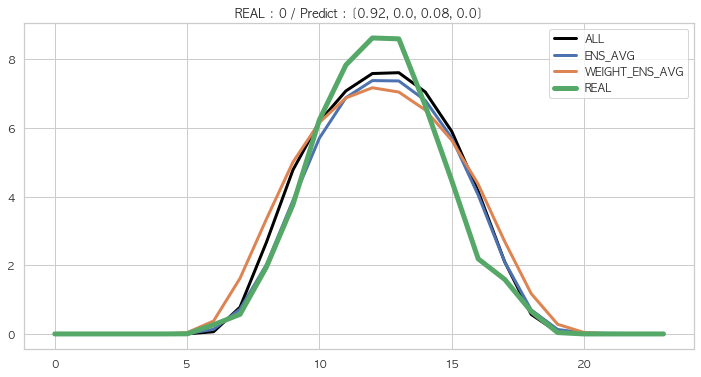

In [19]:
TEST_NUM = 0
WEIGHT_ENS_RESULT = []
ENS_RESULT = []

for i in range(len(ENS_Y_HATS)):
    WEIGHT_ENS_RESULT.append([x*class_yhat[TEST_NUM][i] for x in ENS_Y_HATS[i][TEST_NUM]])
    ENS_RESULT.append([x for x in ENS_Y_HATS[i][TEST_NUM]])
    

WEIGHT_ENS_RESULT = np.array(WEIGHT_ENS_RESULT)
WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.reshape((WEIGHT_ENS_RESULT.shape[0],WEIGHT_ENS_RESULT.shape[1]))
WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.sum(axis=0)

ENS_RESULT = np.array(ENS_RESULT)
ENS_RESULT = ENS_RESULT.reshape((ENS_RESULT.shape[0],ENS_RESULT.shape[1]))
ENS_RESULT = ENS_RESULT.mean(axis=0)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]

plt.title('REAL : '+str(enTest_y[TEST_NUM])+' / Predict : '+str([round(t,2) for t in class_yhat[TEST_NUM]]))

#for i in range(len(ENS_Y_HATS)):
#    plt.plot(x, ENS_Y_HATS[i][TEST_NUM], label = "G_"+str(i),alpha=0.5)

plt.plot(x, ALL_Y_HAT[TEST_NUM], label = "ALL", color="black", linewidth=3, alpha=1)
plt.plot(x, ENS_RESULT, label = "ENS_AVG", linewidth=3, alpha=1)
plt.plot(x, WEIGHT_ENS_RESULT, label = "WEIGHT_ENS_AVG", linewidth=3, alpha=1)

plt.plot(x, enTest_dis_y[TEST_NUM], label = "REAL" , linewidth=5, alpha=1)

plt.legend()
plt.show()



In [22]:
WER = []
ER = []
AR = []
for i in range(len(class_yhat[TEST_NUM])):
    WEIGHT_ENS_RESULT = []
    ENS_RESULT = []
    for j in range(len(ENS_Y_HATS)):
        WEIGHT_ENS_RESULT.append([x*class_yhat[i][j] for x in ENS_Y_HATS[j][i]])
        ENS_RESULT.append([x for x in ENS_Y_HATS[j][i]])
    WEIGHT_ENS_RESULT = np.array(WEIGHT_ENS_RESULT)
    WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.reshape((WEIGHT_ENS_RESULT.shape[0],WEIGHT_ENS_RESULT.shape[1]))
    WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.sum(axis=0)

    ENS_RESULT = np.array(ENS_RESULT)
    ENS_RESULT = ENS_RESULT.reshape((ENS_RESULT.shape[0],ENS_RESULT.shape[1]))
    ENS_RESULT = ENS_RESULT.mean(axis=0)
    
    for q in range(24):
        WER.append(abs(ENS_RESULT[q]-enTest_dis_y[i][q]))
        ER.append(abs(WEIGHT_ENS_RESULT[q]-enTest_dis_y[i][q]))
        AR.append(float(abs(ALL_Y_HAT[i][q]-enTest_dis_y[i][q])))
        

    
print('WEIGHTED Avg. Ensem',sum(WER)/len(WER))
print('AVG Ensem',sum(ER)/len(ER))
print('ALL',sum(AR)/len(AR))

    
    

WEIGHTED Avg. Ensem 0.4633725242546407
AVG Ensem 0.4133288961035862
ALL 0.7335641765700226


In [98]:
spring_y = [x*CY[0] for x in ENS_Y_HATS[0][88]]
summer_y = [x*CY[1] for x in ENS_Y_HATS[1][88]]
autumn_y = [x*CY[2] for x in ENS_Y_HATS[2][88]]
winter_y = [x*CY[3] for x in ENS_Y_HATS[3][88]]
ENS_RESULT = [];
for x in range(len(spring_y)):
    ENS_RESULT.append(spring_y[x]+summer_y[x]+autumn_y[x]+winter_y[x])
print(ENS_RESULT)

[array([0.00605932], dtype=float32), array([-0.00671693], dtype=float32), array([-0.01077399], dtype=float32), array([-0.01656493], dtype=float32), array([-0.02899366], dtype=float32), array([-0.02491196], dtype=float32), array([8.825695], dtype=float32), array([26.762316], dtype=float32), array([46.246075], dtype=float32), array([63.93848], dtype=float32), array([76.21022], dtype=float32), array([84.827156], dtype=float32), array([89.29128], dtype=float32), array([87.65379], dtype=float32), array([79.65645], dtype=float32), array([66.61389], dtype=float32), array([49.736702], dtype=float32), array([29.631063], dtype=float32), array([10.504405], dtype=float32), array([1.76981], dtype=float32), array([0.18270817], dtype=float32), array([0.01037256], dtype=float32), array([-0.02782923], dtype=float32), array([-0.05591202], dtype=float32)]


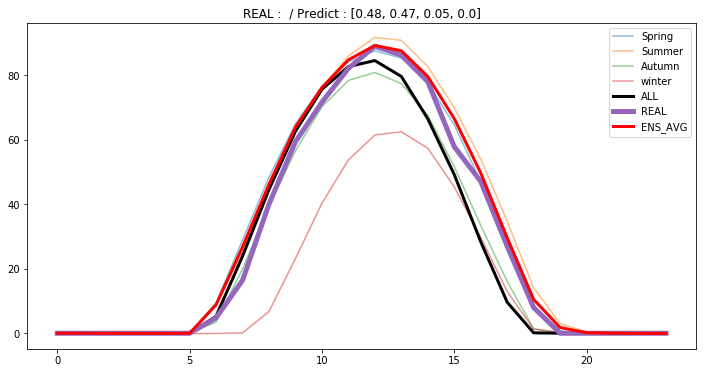

In [99]:

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('REAL : '+' / Predict : '+str([round(t,2) for t in CY]))
plt.plot(x, ENS_Y_HATS[0][88], label = "Spring",alpha=0.5)
plt.plot(x, ENS_Y_HATS[1][88], label = "Summer",alpha=0.5)
plt.plot(x, ENS_Y_HATS[2][88], label = "Autumn",alpha=0.5)
plt.plot(x, ENS_Y_HATS[3][88], label = "winter",alpha=0.5)
plt.plot(x, ALL_Y_HAT[88], label = "ALL", color="black", linewidth=3, alpha=1)

plt.plot(x, enTest_y[88], label = "REAL" , linewidth=5, alpha=1)

plt.plot(x, ENS_RESULT, label = "ENS_AVG", color="red", linewidth=3, alpha=1)

plt.legend()
plt.show()

In [73]:
print(DF[testlinC[0]*24:testlinC[0]*24+24])

      season         GHI     RH     T     TARGET
3624  summer         0.0  86.22  12.0        0.0
3625  summer         0.0  90.05  12.0        0.0
3626  summer         0.0  86.69  11.0        0.0
3627  summer         0.0  88.77  11.0        0.0
3628  summer         0.0  87.05  11.0        0.0
3629  summer     20.9995  83.52  12.0   2.815065
3630  summer  184.612665  79.34  14.0  18.485187
3631  summer  401.109387   64.7  18.0  37.250237
3632  summer  613.730055  44.63  22.0  55.825986
3633  summer  655.787251  35.68  24.0    60.0468
3634  summer  892.143994  33.39  25.0  81.249933
3635  summer  496.646101  31.53  26.0  46.441426
3636  summer       114.0  31.64  26.0  10.695601
3637  summer  905.792725  32.01  26.0   83.03164
3638  summer  925.168666  34.73  25.0   82.93873
3639  summer   781.81057  37.46  24.0  70.085874
3640  summer  315.008588  41.43  23.0  29.366961
3641  summer  389.923539  52.29  21.0  35.747789
3642  summer   178.93979   67.8  19.0   17.45206
3643  summer   18.99

In [74]:
for k in range(100):
    CLASS_X = enTest_X[k:k+1]
    CLASS_X = np.reshape(CLASS_X,(1,72))
    class_yhat = MD.predict(CLASS_X[0:1])
    print(str(testlinC[k]),str(k),[round(x,2) for x in class_yhat[0]])


151 0 [0.0, 1.0, 0.0, 0.0]
45 1 [0.0, 0.0, 0.01, 0.99]
325 2 [0.0, 0.0, 0.0, 1.0]
0 3 [0.0, 0.0, 0.0, 1.0]
160 4 [0.0, 1.0, 0.0, 0.0]
240 5 [0.0, 0.24, 0.76, 0.0]
248 6 [0.0, 0.0, 1.0, 0.0]
80 7 [0.41, 0.0, 0.59, 0.0]
2 8 [0.0, 0.0, 0.0, 1.0]
151 9 [0.0, 1.0, 0.0, 0.0]
275 10 [0.03, 0.0, 0.95, 0.02]
54 11 [0.0, 0.0, 0.0, 1.0]
232 12 [0.0, 0.72, 0.28, 0.0]
187 13 [0.0, 1.0, 0.0, 0.0]
262 14 [0.0, 0.0, 1.0, 0.0]
54 15 [0.0, 0.0, 0.0, 1.0]
205 16 [0.0, 0.0, 1.0, 0.0]
86 17 [0.0, 0.0, 1.0, 0.0]
113 18 [1.0, 0.0, 0.0, 0.0]
159 19 [0.0, 1.0, 0.0, 0.0]
227 20 [0.07, 0.0, 0.93, 0.0]
63 21 [1.0, 0.0, 0.0, 0.0]
71 22 [1.0, 0.0, 0.0, 0.0]
77 23 [0.96, 0.0, 0.04, 0.0]
239 24 [0.0, 0.0, 1.0, 0.0]
195 25 [0.0, 0.0, 1.0, 0.0]
132 26 [0.47, 0.53, 0.0, 0.0]
311 27 [0.0, 0.0, 1.0, 0.0]
207 28 [0.11, 0.89, 0.0, 0.0]
317 29 [0.0, 0.0, 1.0, 0.0]
250 30 [0.0, 0.98, 0.02, 0.0]
289 31 [0.0, 0.0, 1.0, 0.0]
69 32 [0.07, 0.29, 0.64, 0.0]
179 33 [0.0, 1.0, 0.0, 0.0]
264 34 [0.0, 1.0, 0.0, 0.0]
168 35 [0.0, 1.0, 0

[array([-0.01426178], dtype=float32), array([-0.0200482], dtype=float32), array([-0.05645509], dtype=float32), array([-0.05241486], dtype=float32), array([-0.00823432], dtype=float32), array([5.8097568], dtype=float32), array([22.849203], dtype=float32), array([41.030502], dtype=float32), array([56.510937], dtype=float32), array([67.80393], dtype=float32), array([73.554756], dtype=float32), array([75.93917], dtype=float32), array([76.16561], dtype=float32), array([72.78563], dtype=float32), array([64.71867], dtype=float32), array([54.17943], dtype=float32), array([43.35489], dtype=float32), array([31.54638], dtype=float32), array([18.018429], dtype=float32), array([6.2966256], dtype=float32), array([1.01844], dtype=float32), array([0.09923891], dtype=float32), array([0.03506627], dtype=float32), array([0.01847166], dtype=float32)]


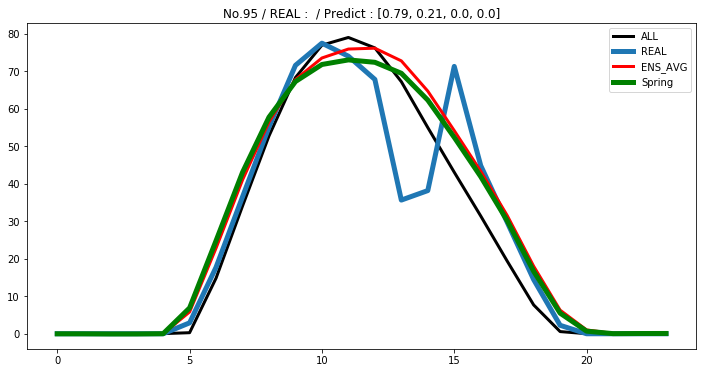

In [108]:
CASE_NUM = 95
CLASS_X = enTest_X[CASE_NUM:CASE_NUM+1]
CLASS_X = np.reshape(CLASS_X,(1,72))
class_yhat = MD.predict(CLASS_X[0:1])
CY = class_yhat[0]

spring_y = [x*CY[0] for x in ENS_Y_HATS[0][CASE_NUM]]
summer_y = [x*CY[1] for x in ENS_Y_HATS[1][CASE_NUM]]
autumn_y = [x*CY[2] for x in ENS_Y_HATS[2][CASE_NUM]]
winter_y = [x*CY[3] for x in ENS_Y_HATS[3][CASE_NUM]]

ENS_RESULT = [];
for x in range(len(spring_y)):
    ENS_RESULT.append(spring_y[x]+summer_y[x]+autumn_y[x]+winter_y[x])
print(ENS_RESULT)


plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('No.'+str(CASE_NUM)+' / REAL : '+' / Predict : '+str([round(t,2) for t in CY]))

plt.plot(x, ALL_Y_HAT[CASE_NUM], label = "ALL", color="black", linewidth=3, alpha=1)

plt.plot(x, enTest_y[CASE_NUM], label = "REAL" , linewidth=5, alpha=1)

plt.plot(x, ENS_RESULT, label = "ENS_AVG", color="red", linewidth=3, alpha=1)
plt.plot(x, ENS_Y_HATS[0][CASE_NUM], label = "Spring",color="green", linewidth=5, alpha=1)

plt.legend()
plt.show()

In [75]:
CASE_NUM = 4
CLASS_X = enTest_X[CASE_NUM:CASE_NUM+1]
CLASS_X = np.reshape(CLASS_X,(1,72))
class_yhat = MD.predict(CLASS_X[0:1])
CY = class_yhat[0]

In [76]:
spring_y = [x*CY[0] for x in ENS_Y_HATS[0][CASE_NUM]]
summer_y = [x*CY[1] for x in ENS_Y_HATS[1][CASE_NUM]]
autumn_y = [x*CY[2] for x in ENS_Y_HATS[2][CASE_NUM]]
winter_y = [x*CY[3] for x in ENS_Y_HATS[3][CASE_NUM]]

In [77]:
ENS_RESULT = [];
for x in range(len(spring_y)):
    ENS_RESULT.append(spring_y[x]+summer_y[x]+autumn_y[x]+winter_y[x])
print(ENS_RESULT)

[array([-0.01573298], dtype=float32), array([-0.00799471], dtype=float32), array([-0.03738719], dtype=float32), array([-0.06176573], dtype=float32), array([-0.11457781], dtype=float32), array([1.7230115], dtype=float32), array([15.517646], dtype=float32), array([33.895947], dtype=float32), array([52.40765], dtype=float32), array([70.54857], dtype=float32), array([83.02058], dtype=float32), array([92.05417], dtype=float32), array([95.60867], dtype=float32), array([93.66568], dtype=float32), array([85.54496], dtype=float32), array([72.6705], dtype=float32), array([56.52557], dtype=float32), array([38.357376], dtype=float32), array([19.69754], dtype=float32), array([6.1696515], dtype=float32), array([1.3547331], dtype=float32), array([0.28675365], dtype=float32), array([0.04685507], dtype=float32), array([-0.01930561], dtype=float32)]


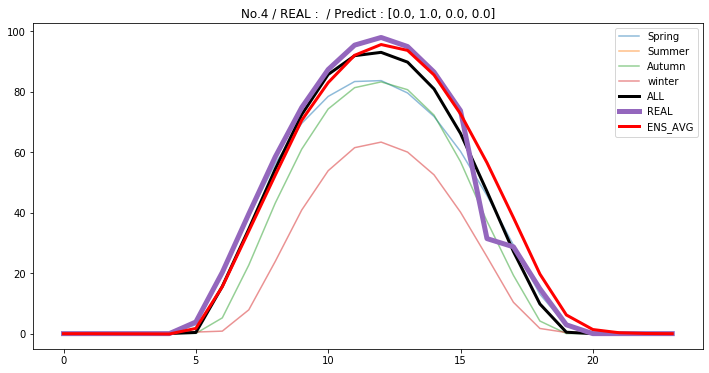

In [78]:

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('No.'+str(CASE_NUM)+' / REAL : '+' / Predict : '+str([round(t,2) for t in CY]))
plt.plot(x, ENS_Y_HATS[0][CASE_NUM], label = "Spring",alpha=0.5)
plt.plot(x, ENS_Y_HATS[1][CASE_NUM], label = "Summer",alpha=0.5)
plt.plot(x, ENS_Y_HATS[2][CASE_NUM], label = "Autumn",alpha=0.5)
plt.plot(x, ENS_Y_HATS[3][CASE_NUM], label = "winter",alpha=0.5)
plt.plot(x, ALL_Y_HAT[CASE_NUM], label = "ALL", color="black", linewidth=3, alpha=1)

plt.plot(x, enTest_y[CASE_NUM], label = "REAL" , linewidth=5, alpha=1)

plt.plot(x, ENS_RESULT, label = "ENS_AVG", color="red", linewidth=3, alpha=1)

plt.legend()
plt.show()

In [113]:
CASE_NUM = 4
CLASS_X = enTest_X[CASE_NUM:CASE_NUM+1]
CLASS_X = np.reshape(CLASS_X,(1,72))
class_yhat = MD.predict(CLASS_X[0:1])
CY = class_yhat[0]

In [114]:
spring_y = [x for x in ENS_Y_HATS[0][CASE_NUM]]
summer_y = [x for x in ENS_Y_HATS[1][CASE_NUM]]
autumn_y = [x for x in ENS_Y_HATS[2][CASE_NUM]]
winter_y = [x for x in ENS_Y_HATS[3][CASE_NUM]]


In [115]:

ENS_RESULT = [];
for x in range(len(spring_y)):
    ENS_RESULT.append((spring_y[x]+summer_y[x]+autumn_y[x]+winter_y[x])/4)
print(ENS_RESULT)

[array([0.02805915], dtype=float32), array([0.02811512], dtype=float32), array([0.02444718], dtype=float32), array([0.02590999], dtype=float32), array([0.07563231], dtype=float32), array([1.3088375], dtype=float32), array([10.279532], dtype=float32), array([25.779629], dtype=float32), array([43.928783], dtype=float32), array([60.487164], dtype=float32), array([72.409744], dtype=float32), array([79.567184], dtype=float32), array([81.466965], dtype=float32), array([78.48757], dtype=float32), array([70.53124], dtype=float32), array([57.494583], dtype=float32), array([41.209583], dtype=float32), array([24.317902], dtype=float32), array([9.648948], dtype=float32), array([2.3087692], dtype=float32), array([0.45176706], dtype=float32), array([0.1215157], dtype=float32), array([0.05358549], dtype=float32), array([0.01799552], dtype=float32)]


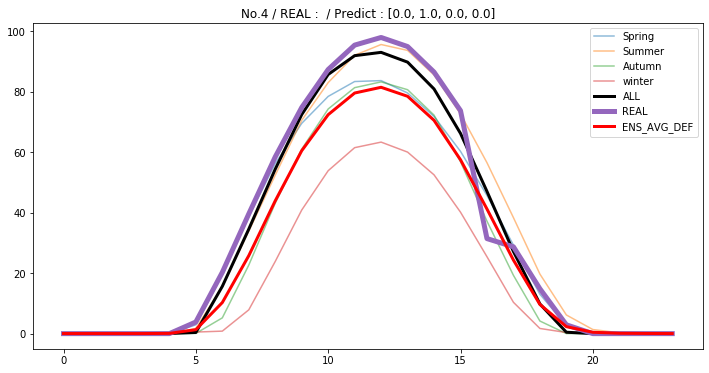

In [117]:

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('No.'+str(CASE_NUM)+' / REAL : '+' / Predict : '+str([round(t,2) for t in CY]))
plt.plot(x, ENS_Y_HATS[0][CASE_NUM], label = "Spring",alpha=0.5)
plt.plot(x, ENS_Y_HATS[1][CASE_NUM], label = "Summer",alpha=0.5)
plt.plot(x, ENS_Y_HATS[2][CASE_NUM], label = "Autumn",alpha=0.5)
plt.plot(x, ENS_Y_HATS[3][CASE_NUM], label = "winter",alpha=0.5)
plt.plot(x, ALL_Y_HAT[CASE_NUM], label = "ALL", color="black", linewidth=3, alpha=1)

plt.plot(x, enTest_y[CASE_NUM], label = "REAL" , linewidth=5, alpha=1)

plt.plot(x, ENS_RESULT, label = "ENS_AVG_DEF", color="red", linewidth=3, alpha=1)

plt.legend()
plt.show()

In [79]:
#print(enTest_DF[testlinC[CASE_NUM]])
print(enTest_DF[4])

[[21360 'summer' 0.0 0.0 0.0 4.7 42.1 16.0 0.0]
 [21361 'summer' 0.0 0.0 0.0 4.6 43.96 16.0 0.0]
 [21362 'summer' 0.0 0.0 0.0 4.1 45.32 15.0 0.0]
 [21363 'summer' 0.0 0.0 0.0 3.6 46.64 14.0 0.0]
 [21364 'summer' 0.0 0.0 0.0 3.1 45.26 13.0 0.0]
 [21365 'summer' 22.0 280.0 21.998971502571063 3.1 42.93 15.0 3.847128682]
 [21366 'summer' 51.0 661.0 198.08430838968297 3.6 32.61 18.0 20.26713155]
 [21367 'summer' 67.0 822.0 423.6504904373261 4.1 24.48 22.0 39.59422902]
 [21368 'summer' 77.0 903.0 640.0098092142623 3.3 19.06 25.0 58.45116402]
 [21369 'summer' 86.0 948.0 827.175314900825 2.1 16.99 27.0 74.77456421]
 [21370 'summer' 92.0 971.0 966.8403285826558 1.7 15.5 29.0 87.34452786]
 [21371 'summer' 87.0 996.0 1058.0280842335956 1.9 14.01 31.0 95.41077526]
 [21372 'summer' 89.0 995.0 1084.0 2.3 13.35 32.0 97.94272793]
 [21373 'summer' 89.0 987.0 1051.253734074858 2.6 12.75 32.0 94.94065198]
 [21374 'summer' 92.0 961.0 957.8306444571908 2.9 12.82 33.0 86.49636244]
 [21375 'summer' 87.0 930.

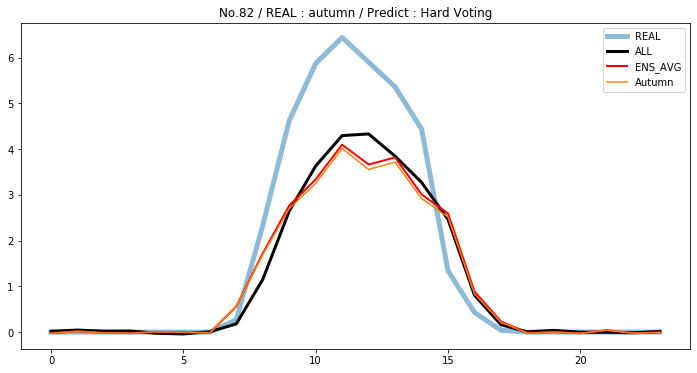

In [59]:

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('No.'+str(CASE_NUM)+' / REAL : '+DISPLAY_Y[CASE_NUM]+' / Predict : Hard Voting')

plt.plot(x, enTest_y[CASE_NUM], label = "REAL" , linewidth=5, alpha=0.5)



plt.plot(x, ALL_Y_HAT[CASE_NUM], label = "ALL", color="black", linewidth=3, alpha=1)



plt.plot(x, ENS_RESULT, label = "ENS_AVG", color="red", linewidth=2, alpha=1)

plt.plot(x, ENS_Y_HATS[2][CASE_NUM], label = "Autumn",alpha=2.0)

plt.legend()
plt.show()

In [47]:
print(enTest_y[CASE_NUM])

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.19 0.34 0.8  0.77
 0.53 0.36 0.22 0.1  0.   0.   0.   0.   0.   0.  ]


In [9]:
from sklearn.metrics import jaccard_score 
y_hat_2 = new_model_2.predict(test_X)

scores2 = [];
for i in range(len(y_hat_2)):
    score = [];
    for j in range(len(y_hat_2[i])):
        score.append(abs(y_hat_2[i][j]-test_y[i][j]))
    scores2.append(sum(score))
    
print(-sum(scores2))


-78.96854687690127


In [10]:
ensembled =  [];
for i in range(len(scores)):
    ensembled.append(min(scores[i],scores2[i]))

print(-sum(ensembled))

-74.04462502495889


In [12]:
from sklearn.ensemble import VotingRegressor

In [13]:
ensemble_clf = VotingClassifier([ClassifierChain(base_lr, order='random', random_state=i) for i in range(10)])
ensemble_clf.fit(X_train, Y_train)
Y_pred_ensemble = ensemble_clf.predict(X_test)

er = VotingRegressor([('m1', new_model_1), ('m2', new_model_2)])

In [22]:
TY = list(train_y)
TX = list(train_X)

eTX = list(enTest_X)
print(TY)

[array([0.28172589, 0.26142132, 0.25126904, 0.24873096, 0.24619289,
       0.24873096, 0.23857868, 0.24111675, 0.24111675, 0.31472081,
       0.50507614, 0.55329949, 0.5964467 , 0.60152284, 0.57106599,
       0.56852792, 0.56852792, 0.54568528, 0.53553299, 0.52284264,
       0.5177665 , 0.51269036, 0.46446701, 0.44416244]), array([0.43908629, 0.43654822, 0.43654822, 0.36548223, 0.31979695,
       0.30203046, 0.28172589, 0.26903553, 0.24873096, 0.24619289,
       0.2284264 , 0.23096447, 0.2284264 , 0.23604061, 0.23350254,
       0.21573604, 0.21319797, 0.18020305, 0.19035533, 0.18020305,
       0.1751269 , 0.16751269, 0.16497462, 0.15482234]), array([0.16243655, 0.15482234, 0.15228426, 0.14720812, 0.13959391,
       0.13705584, 0.13451777, 0.13705584, 0.1319797 , 0.11928934,
       0.12944162, 0.14720812, 0.14213198, 0.14720812, 0.12690355,
       0.1319797 , 0.13705584, 0.1142132 , 0.10913706, 0.10659898,
       0.08883249, 0.08883249, 0.08883249, 0.08121827]), array([0.08375635, 0.088

In [23]:
eny_hat = er.fit(train_X, train_y).predict(eTX)
print(eny_hat)

ValueError: y should be a 1d array, got an array of shape (1, 99, 24) instead.

In [7]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from numpy import argmax


In [8]:
'''
def define_stacked_model(members):
    # update all layers in all models to not be trainable
    stacked = []
    for i in range(len(members)):
        stacked.append(members[i])
        print(stacked[i].layers)
        for layer in stacked[i].layers:
            # make not trainable
            layer.trainable = False
            print(layer.trainable)
            # rename to avoid 'unuque layer name' issue
            layer._name = 'ensemble_' + str(i+1) + '_' + layer._name
            print(layer.name)

    # define multi-headed input
    #print([model.input._name for model in stacked])
    ensemble_visible = [model.input for model in stacked]
    
    print(ensemble_visible)
    
    # concatenate merge output from each model
    ensemble_outputs = [model.output for model in stacked]
    
    merge = Concatenate()(ensemble_outputs)
    print(merge)
    print(ensemble_visible)

    hidden = Dense(48, activation = 'relu')(merge)    
    output = Dense(24, activation = 'relu')(hidden)
    resmodel = Model(inputs=ensemble_visible, outputs=output)
    #model = Model()


    # compile
    resmodel.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
    return resmodel
'''

In [8]:

def define_stacked_model(members):
    # update all layers in all models to not be trainable
    stacked = []
    for i in range(len(members)):
        stacked.append(members[i])
        stacked[i].layers.pop(0)
        print(stacked[i].layers)
        for layer in stacked[i].layers:
            # make not trainable
            layer.trainable = False
            # rename to avoid 'unuque layer name' issue
            layer._name = 'ensemble_' + str(i+1) + '_' + layer._name

    # define multi-headed input
    #print([model.input._name for model in stacked])
    ensemble_visible = [model.input for model in stacked]
    
    print(ensemble_visible)
    
    # concatenate merge output from each model
    ensemble_outputs = [model.output for model in stacked]
    
    merge = Concatenate()(ensemble_outputs)

    hidden = Dense(48, activation = 'relu')(merge)
    hidden = Dense(48, activation = 'relu')(hidden)
    hidden = Dense(48, activation = 'relu')(hidden)
    hidden = Dense(48, activation = 'relu')(hidden)
    hidden = Dense(48, activation = 'relu')(hidden)
    hidden = Dense(48, activation = 'relu')(hidden)
    output = Dense(24, activation = 'relu')(hidden)
    resmodel = Model(inputs=ensemble_visible, outputs=output)
    #model = Model()


    # compile
    resmodel.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
    return resmodel

In [9]:
# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    print(X)
    # encode output data
    inputy_enc = inputy
    # fir model
    model.fit(X, inputy_enc, epochs=100, verbose=0)

In [10]:
# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # make prediction
    return model.predict(X, verbose=0)

In [29]:
allmodels[0].get_weights()

[array([[ 0.11400803, -0.07986153, -0.11942217, ..., -0.07593476,
         -0.01110856, -0.09566356],
        [-0.00170244,  0.06962185, -0.10666756, ..., -0.1434741 ,
         -0.08166353,  0.04757338],
        [-0.04777295, -0.11927611, -0.09481485, ...,  0.04283136,
          0.03406397, -0.01361871],
        [ 0.1015773 , -0.0411646 ,  0.05193997, ...,  0.07580056,
         -0.05787716,  0.06933513]], dtype=float32),
 array([[-0.06919399,  0.08687636, -0.06762175, ...,  0.04445713,
          0.05050233,  0.07676825],
        [-0.04003389, -0.00470281, -0.00836271, ...,  0.0612854 ,
         -0.02343655, -0.00958333],
        [-0.10643806,  0.0638142 ,  0.02757775, ...,  0.04064193,
          0.04275786, -0.03498914],
        ...,
        [ 0.11628837,  0.10846146, -0.02343175, ..., -0.01726292,
         -0.02079818, -0.03773096],
        [ 0.02132194,  0.00076812,  0.04183189, ...,  0.04062323,
         -0.01127448, -0.13545634],
        [ 0.01659483, -0.04090573,  0.03186158, ...,

In [35]:
allmodels[1].layers.pop(0)
allmodels[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ensemble_2_ensemble_2_ensemb [(None, 24, 4)]           0         
_________________________________________________________________
ensemble_2_ensemble_2_ensemb (None, 120)               60000     
_________________________________________________________________
ensemble_2_ensemble_2_ensemb (None, 24)                2904      
Total params: 125,808
Trainable params: 62,904
Non-trainable params: 62,904
_________________________________________________________________


In [38]:
newInput = tf.keras.Input(shape=(train_X.shape[1], train_X.shape[2]))    # let us say this new InputLayer
allmodels[1].layers[0] = newInput
allmodels[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ensemble_2_ensemble_2_ensemb [(None, 24, 4)]           0         
_________________________________________________________________
ensemble_2_ensemble_2_ensemb (None, 120)               60000     
_________________________________________________________________
ensemble_2_ensemble_2_ensemb (None, 24)                2904      
Total params: 125,808
Trainable params: 62,904
Non-trainable params: 62,904
_________________________________________________________________


In [11]:

allmodels=[]
allmodels.append(new_model_1)
allmodels.append(new_model_2)

# define ensemble model



In [12]:
stacked_model = define_stacked_model(allmodels)


[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x14fd5cee0>, <tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x131277fd0>, <tensorflow.python.keras.layers.core.Dense object at 0x114be8b50>]
[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x14ffb7580>, <tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x14ffb7af0>, <tensorflow.python.keras.layers.core.Dense object at 0x14fffef10>]
[<tf.Tensor 'input_1:0' shape=(?, 24, 4) dtype=float32>, <tf.Tensor 'input_1_1:0' shape=(?, 24, 4) dtype=float32>]


In [13]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, enTest_X, enTest_y)
stacked_model.summary()

[array([[[0.29441624, 0.        , 0.97      , 0.        ],
        [0.27664975, 0.        , 0.97      , 0.        ],
        [0.26395939, 0.        , 0.98      , 0.        ],
        ...,
        [0.5       , 0.01445783, 0.83      , 1.        ],
        [0.4822335 , 0.        , 0.78      , 0.4       ],
        [0.46700508, 0.        , 0.68      , 0.        ]],

       [[0.22588832, 0.        , 0.75      , 0.9       ],
        [0.22335025, 0.        , 0.76      , 0.        ],
        [0.2284264 , 0.        , 0.72      , 0.        ],
        ...,
        [0.17258883, 0.        , 0.67      , 0.5       ],
        [0.16497462, 0.        , 0.66      , 0.9       ],
        [0.16243655, 0.        , 0.64      , 0.9       ]],

       [[0.74111675, 0.        , 0.97      , 0.7       ],
        [0.73857868, 0.        , 0.97      , 0.7       ],
        [0.73857868, 0.        , 0.97      , 0.6       ],
        ...,
        [0.69796954, 0.        , 0.97      , 0.1       ],
        [0.68020305, 0.     

In [14]:
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, enTest_X)
Syhat_1 = new_model_1.predict(enTest_X)
Syhat_2 = new_model_2.predict(enTest_X)



In [15]:

scores = [];
for i in range(len(yhat)):
    score = [];
    for j in range(len(yhat[i])):
        score.append(abs(yhat[i][j]-enTest_y[i][j]))
    scores.append(sum(score))
    
print(-sum(scores))

-350.2839625329536


In [16]:
scores = [];
for i in range(len(Syhat_1)):
    score = [];
    for j in range(len(Syhat_1[i])):
        score.append(abs(Syhat_1[i][j]-enTest_y[i][j]))
    scores.append(sum(score))
    
print(-sum(scores))

-124.07145633772583


In [17]:
scores = [];
for i in range(len(Syhat_2)):
    score = [];
    for j in range(len(Syhat_2[i])):
        score.append(abs(Syhat_2[i][j]-enTest_y[i][j]))
    scores.append(sum(score))
    
print(-sum(scores))

-80.32773431407544


In [21]:
enTest_y[1]

array([0.15736041, 0.14213198, 0.13705584, 0.13451777, 0.12436548,
       0.11167513, 0.10152284, 0.09898477, 0.09390863, 0.17766497,
       0.2893401 , 0.47969543, 0.50253807, 0.5177665 , 0.53553299,
       0.51015228, 0.49238579, 0.46446701, 0.39340102, 0.34010152,
       0.30964467, 0.29187817, 0.28172589, 0.25888325])

In [27]:
from sklearn.ensemble import VotingRegressor, VotingClassifier


In [30]:
estimators = [('m2', new_model_2),('m1', new_model_1)]

# 평점 예측 모형
reg_rating = VotingRegressor(estimators)
reg_rating.fit(Xdata, Ydata)

reg_pred = reg_rating.predict(enTest_X)


ValueError: y should be a 1d array, got an array of shape (332, 24) instead.

In [ ]:

#TEST = series_to_supervised(TEST)
#TEST.drop(TEST.columns[[5,6,7,8,9]], axis=1, inplace=True)

#TEST = pd.DataFrame(TEST)

#tmp=DF['pow'].multiply(0.001).tolist()
#tmp=DF['TARGET'].to_list()
#print(type(tmp[0]))
#tmp = tmp[:]

#TRAIN_Y=np.array(tmp[:n_train_hours*24])
#TEST_Y=np.array(tmp[n_train_hours:])
#print(TRAIN_Y.shape)

#TRAIN_Y = np.reshape(TRAIN_Y,(TRAIN_Y.shape[0],1))


#TEST.insert(loc=0, column='t_pow', value=tmp[:len(tmp)-24])
#TEST.insert(loc=3, column='TARGET', value=tmp)

#Yscaler = preprocessing.MinMaxScaler(feature_range=(0, 10))

#YTEST = Yscaler.fit_transform(TRAIN_Y)
#YTEST = np.reshape(YTEST,(YTEST.shape[0],))


#y = DF['TARGET']
#x = DF[['GHI','RH','T']]

#X_display = x
#y_display = y

#print(TEST.shape)


#values = TEST.values

#n_train_hours = int((values.shape[0]/24)*0.7) #70% 데이터만 가져온다
#n_train_hours_end = int((values.shape[0]/24)*0.6) #70% 데이터만 가져온다

print(values.shape)

Xdata = values[:, :-1]
#Xdata = Xdata[:-(Xdata.shape[0]%(24*5)), :]
Xdata = Xdata.reshape((int(Xdata.shape[0]/24),24,3))

Ydata = values[:, -1]

#Ydata = Ydata[:-(Ydata.shape[0]%(24*5))]
Ydata = Ydata.reshape((int(Ydata.shape[0]/24),24))


train_X = Xdata
test_X = Xdata

#train_y = Ydata.reshape((int(Ydata.shape[0]/24),24))
train_y = Ydata
test_y = Ydata


#train_X = Xdata[n_train_hours:n_train_hours_end, :]
#test_X = Xdata[n_train_hours_end:, :]

#train_y = Ydata[n_train_hours:n_train_hours_end, :]
#test_y = Ydata[n_train_hours_end:, :]


#train = values[:n_train_hours, :]
#validate = values[n_train_hours:n_train_hours*2, :]
#test = values[n_train_hours:, :]
# split into input and outputs
#train_X, train_y = train[:, :-1], train[:, -1]
#test_X, test_y = test[:, :-1], test[:, -1]
#validate_X, validate_y = validate[:, 1:], validate[:, 1]

#print(train_X,train_y)



#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape)
print(test_X.shape)
print(train_y[0])

train_y = train_y.reshape((train_y.shape[0],train_y.shape[1],1))
print(train_y.shape)

In [ ]:


'''
inputs = tf.keras.Input(shape=(train_X.shape[1], train_X.shape[2]))
x = tf.keras.layers.LSTM(120)(inputs)
prediction = tf.keras.layers.Dense(24)(x)

model_functional = tf.keras.Model(inputs=inputs, outputs=prediction, name=MNAME)

optimizer = tf.keras.optimizers.Adam()

model_functional.compile(loss='mean_squared_error', optimizer=optimizer, metrics=["mean_squared_error"])

#model_functional.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=["mean_absolute_error"])
#model.compile(loss='mean_squared_logarithmic_error', optimizer=optimizer, metrics=['accuracy'])

history = model_functional.fit(train_X, train_y, epochs=100, verbose=1, shuffle=False, 
                    validation_data=(test_X, test_y), callbacks=[weight_callback] )
#validation_data=(test_X, test_y),

'''